<h1 style="text-align: center; font-weight: bold; font-family: Times New Roman; font-size: 38px; text-decoration: underline">Iris flowers Classification ML Project</h1>

<span style="font-weight: bold; font-family: Times New Roman; font-size: 24px;">Author: <span style="text-decoration: underline;">Hesham Saad</span>

<div style="font-weight: bold; font-family: Times New Roman; font-size: 24px;">Project Description</div>
<span style="text-align: justify; font-weight: bold; font-style: italic; font-family: Times New Roman; font-size: 16px;">
This project uses the Support Vector Machine (SVM) algorithm to classify Iris flower species (Setosa, Versicolor, Virginica) from the Iris dataset, based on four features: sepal and petal dimensions. It involves data exploration, preprocessing with Standard Scaling, and training SVM models with Linear, Polynomial, and RBF kernels. Model accuracy is evaluated and compared using metrics and visualizations, highlighting the impact of kernel choice on performance. Built with Python, Pandas, Scikit-learn, and Matplotlib, it serves as an educational tool for machine learning and data classification
</span>

<div style="font-weight: bold; font-family: Times New Roman; font-size: 24px;">Dataset:</div>
<ul style="text-align: justify; font-weight: bold; font-style: italic; font-family: Times New Roman; font-size: 16px;">
    <li>The Iris dataset from scikit-learn contains 150 samples with 4 features.</li>
    <li>(sepal length, sepal width, petal length, petal width) and 3 classes.</li>
</ul>

<span style="font-weight: bold; font-family: Times New Roman; font-size: 24px;">Import Libraries</span>

In [25]:
# Importing necessary libraries for data analysis, visualization, and modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Set visualization style
sns.set(style='whitegrid')

<span style="font-weight: bold; font-family: Times New Roman; font-size: 24px;">Data Collection</span>

In [3]:
# Load the Iris dataset (built into sklearn)
iris = datasets.load_iris()
iris_data = iris.data  # Features: measurements of flowers
iris_target = iris.target  # Labels: 0=Setosa, 1=Versicolor, 2=Virginica
# Create a DataFrame for easier exploration
df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris_target, iris.target_names)

<span style="font-weight: bold; font-family: Times New Roman; font-size: 24px;">Data Exploration</span>

In [107]:
# Perform preliminary analysis: data head
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [108]:
# Perform preliminary analysis: nData Shape
df.shape

(150, 5)

In [109]:
# Perform preliminary analysis: data types, and distributions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


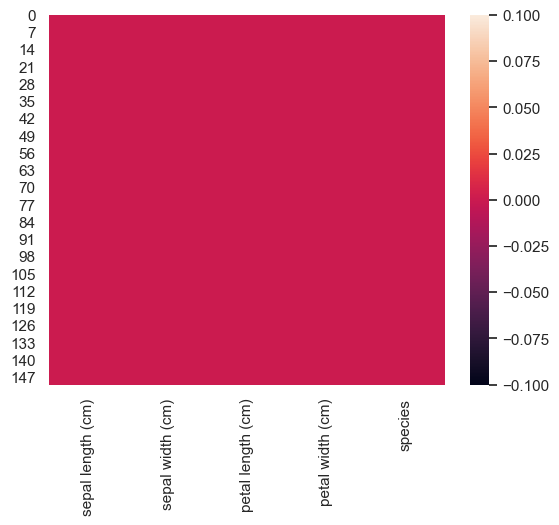

In [46]:
# Visualize missing values heatmap
sns.heatmap(df.isnull())
plt.show()

In [5]:
# Summary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [111]:
# How many flowers per type
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

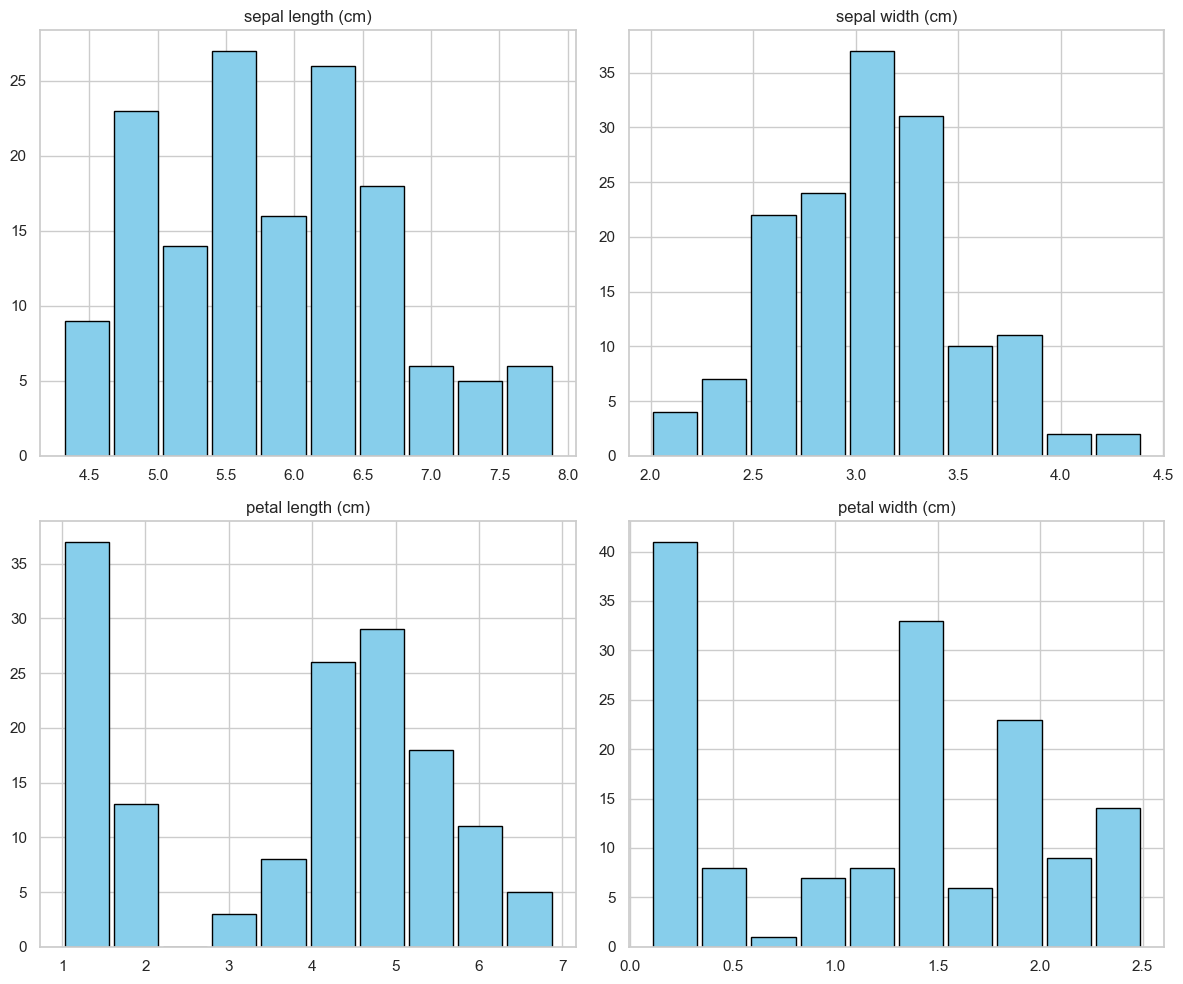

In [128]:
# Visualize distributions of numerical features
df.hist(figsize=(12, 10), rwidth=0.9, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

<span style="font-weight: bold; font-family: Times New Roman; font-size: 24px;">Data Visualization</span>

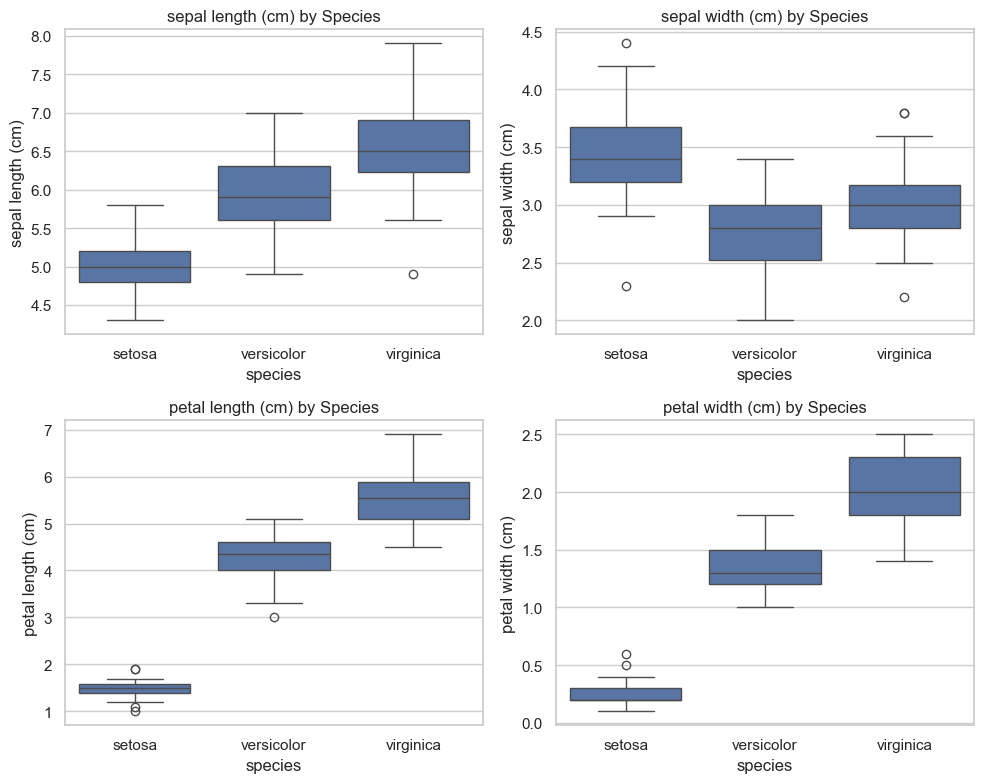

In [130]:
# Plot boxplots to see how measurements differ by species
plt.figure(figsize=(10, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'{feature} by Species')
plt.tight_layout()
plt.show()

In [10]:
# Create scatter plots to visualize relationships between Iris flower features (sepal and petal) for each species
# Define lists for colors and species to use in plotting
color = ['red','Orange','Blue']
species = ['setosa','versicolor','virginica']

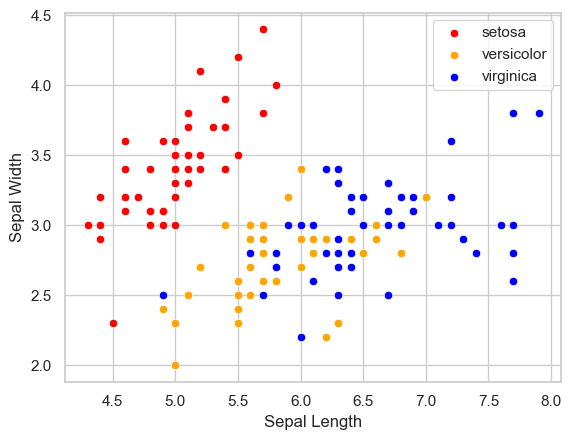

In [18]:
# Compare sepal length vs. sepal width
for i in range(len(species)):
    x = df[df['species'] == species[i]]
    sns.scatterplot(x = x['sepal length (cm)'], y = x['sepal width (cm)'], color = color[i], label = species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

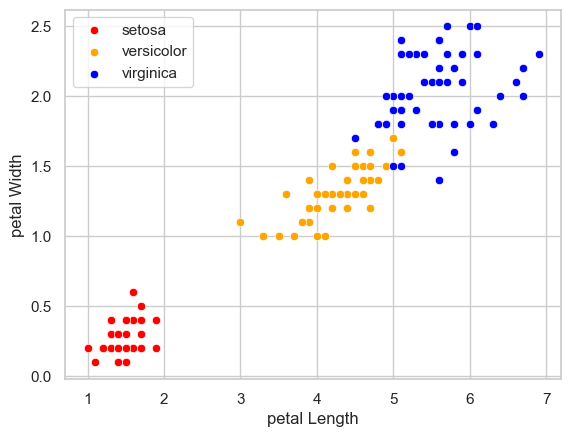

In [20]:
# Compare petal length vs. petal width    
for i in range(len(species)):
    x = df[df['species'] == species[i]]
    sns.scatterplot(x = x['petal length (cm)'], y = x['petal width (cm)'], color = color[i], label = species[i])
    
plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.legend()
plt.show()

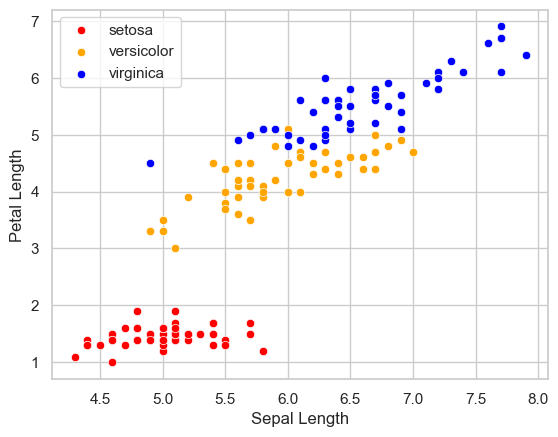

In [21]:
# Compare sepal length vs. petal length
for i in range(len(species)):
    x = df[df['species'] == species[i]]
    sns.scatterplot(x = x['sepal length (cm)'], y = x['petal length (cm)'], color = color[i], label = species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

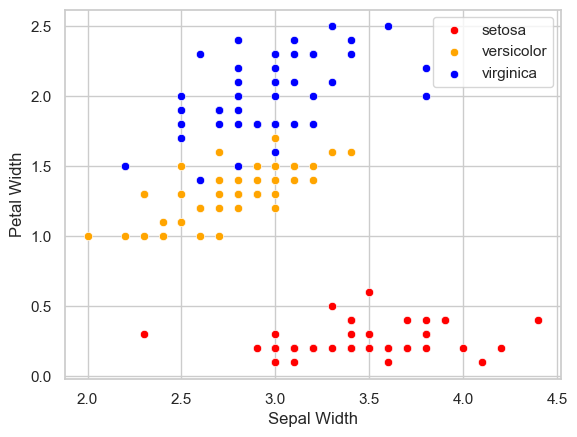

In [24]:
# Compare sepal width vs. petal width
for i in range(len(species)):
    x = df[df['species'] == species[i]]
    sns.scatterplot(x = x['sepal width (cm)'], y = x['petal width (cm)'], color = color[i], label = species[i])
    
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

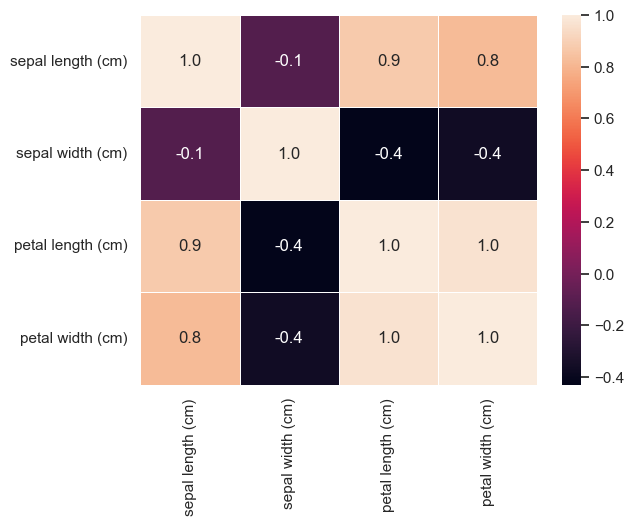

In [113]:
# Linearity using correlation cofficient matrix using corr
correlation = df.drop(['species'], axis=1).corr()
sns.heatmap(correlation, annot=True, fmt='.1f', linewidth=0.5)
plt.show()

<span style="font-weight: bold; font-family: Times New Roman; font-size: 24px;">Model Preparation</span>

In [27]:
# Split data: 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.3, random_state=1234, stratify=iris_target)

<span style="font-weight: bold; font-family: Times New Roman; font-size: 24px;">Model Training & Model Evaluation</span>

In [30]:
# We'll try 4 different SVM settings (kernels): rbf, linear, poly, sigmoid
kernels = ['rbf', 'linear', 'poly', 'sigmoid']
results = {}  # Store results for each kernel

for kernel in kernels:
    # Create SVM model
    model = SVC(kernel=kernel, gamma=1.0, random_state=1234)
   
    # Train the model on training data
    model.fit(X_train, y_train)
    
    # Make predictions on test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy (how many predictions were correct)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Create confusion matrix (shows where model made mistakes)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[kernel] = {'accuracy': accuracy, 'confusion_matrix': cm}
    
    # Print results
    print(f"\nResults for {kernel.upper()} Kernel:")
    print(f"Accuracy: {accuracy:.2f} (correct predictions out of total)")
    print("Confusion Matrix:")
    print(cm)


Results for RBF Kernel:
Accuracy: 0.98 (correct predictions out of total)
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]

Results for LINEAR Kernel:
Accuracy: 0.96 (correct predictions out of total)
Confusion Matrix:
[[15  0  0]
 [ 0 13  2]
 [ 0  0 15]]

Results for POLY Kernel:
Accuracy: 0.93 (correct predictions out of total)
Confusion Matrix:
[[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]

Results for SIGMOID Kernel:
Accuracy: 0.33 (correct predictions out of total)
Confusion Matrix:
[[ 0  0 15]
 [ 0  0 15]
 [ 0  0 15]]


<span style="font-weight: bold; font-family: Times New Roman; font-size: 24px;">Result Analysis</span>

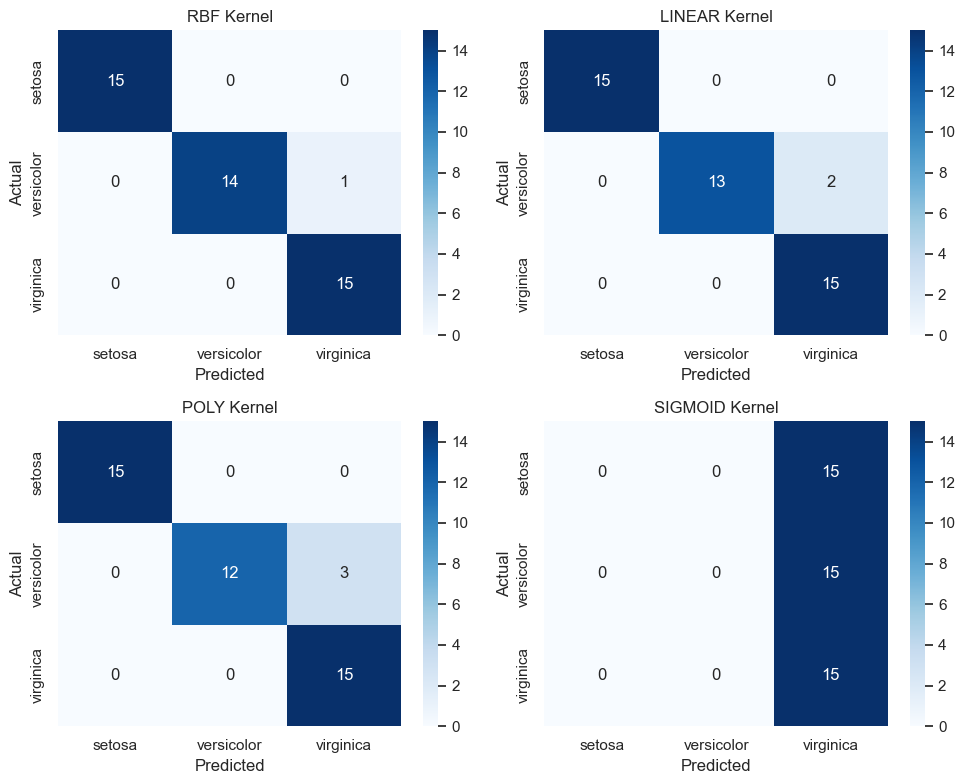

In [140]:
# Plot confusion matrices for each kernel
plt.figure(figsize=(10, 8))
for i, kernel in enumerate(kernels, 1):
    plt.subplot(2, 2, i)
    cm = results[kernel]['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f'{kernel.upper()} Kernel')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

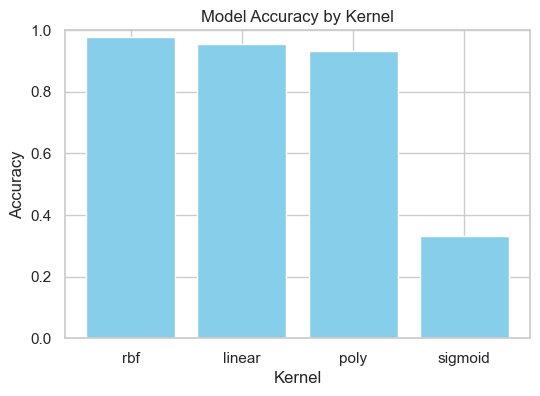

In [34]:
# Plot accuracy comparison
accuracies = [results[kernel]['accuracy'] for kernel in kernels]
plt.figure(figsize=(6, 4))
plt.bar(kernels, accuracies, color='skyblue')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Kernel')
plt.ylim(0, 1)
plt.show()